<a href="https://colab.research.google.com/github/saha-indranil/ml-projects/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install -q gradio
import gradio as gr
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Flatten, Dense, Softmax

# Import the Data

the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels). We are training a neural network model to classify images of clothing, like sneakers and shirts.


| Label |	Class |
| ----- | ----- |
|0	    | T-shirt/top |
|1	    | Trouser |
|2	    | Pullover |
|3	    | Dress |
|4	    | Coat |
|5	    | Sandal |
|6	    | Shirt |
|7	    | Sneaker |
|8	    | Bag |
|9	    | Ankle boot |

In [63]:
# The Fashion MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


# Preprocess the data

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

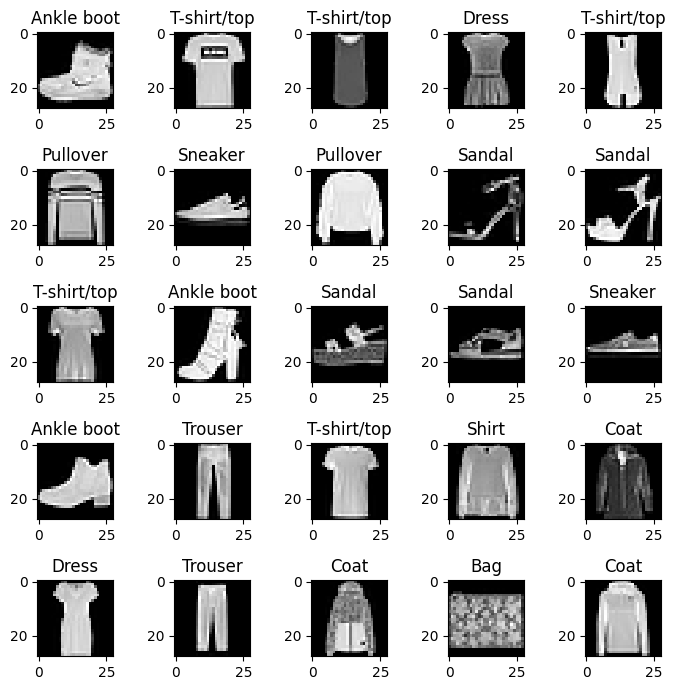

In [64]:
plt.rcParams['figure.figsize'] = (7,7)

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title(class_names[y_train[i]])

plt.tight_layout()

In [65]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

# Build the model

In [66]:
model = Sequential([
    Flatten(input_shape=(28, 28), name="L0"),
    Dense(200, activation='relu', name="L1"),
    Dense(80, activation='relu', name="L2"),
    Dense(10, activation='linear', name="L3")
])

In [67]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L0 (Flatten)                (None, 784)               0         
                                                                 
 L1 (Dense)                  (None, 200)               157000    
                                                                 
 L2 (Dense)                  (None, 80)                16080     
                                                                 
 L3 (Dense)                  (None, 10)                810       
                                                                 
Total params: 173,890
Trainable params: 173,890
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.fit(X_train,y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 5s 9ms/step - loss: 0.5204 - accuracy: 0.8173
Epoch 2/15
469/469 [==============================] - 5s 10ms/step - loss: 0.3746 - accuracy: 0.8646
Epoch 3/15
469/469 [==============================] - 7s 16ms/step - loss: 0.3339 - accuracy: 0.8791
Epoch 4/15
469/469 [==============================] - 8s 17ms/step - loss: 0.3099 - accuracy: 0.8865
Epoch 5/15
469/469 [==============================] - 6s 13ms/step - loss: 0.2914 - accuracy: 0.8927
Epoch 6/15
469/469 [==============================] - 8s 18ms/step - loss: 0.2797 - accuracy: 0.8963
Epoch 7/15
469/469 [==============================] - 6s 12ms/step - loss: 0.2679 - accuracy: 0.9000
Epoch 8/15
469/469 [==============================] - 8s 16ms/step - loss: 0.2548 - accuracy: 0.9049
Epoch 9/15
469/469 [==============================] - 6s 12ms/step - loss: 0.2436 - accuracy: 0.9087
Epoch 10/15
469/469 [==============================] - 7s 15ms/step - loss: 0.2351 - accurac

In [69]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.3437 - accuracy: 0.8853 - 924ms/epoch - 3ms/step
Test accuracy: 0.8852999806404114


In [70]:
fashion_model = Sequential([model, Softmax()])
predictions = fashion_model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


# Verify predictions

In [71]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

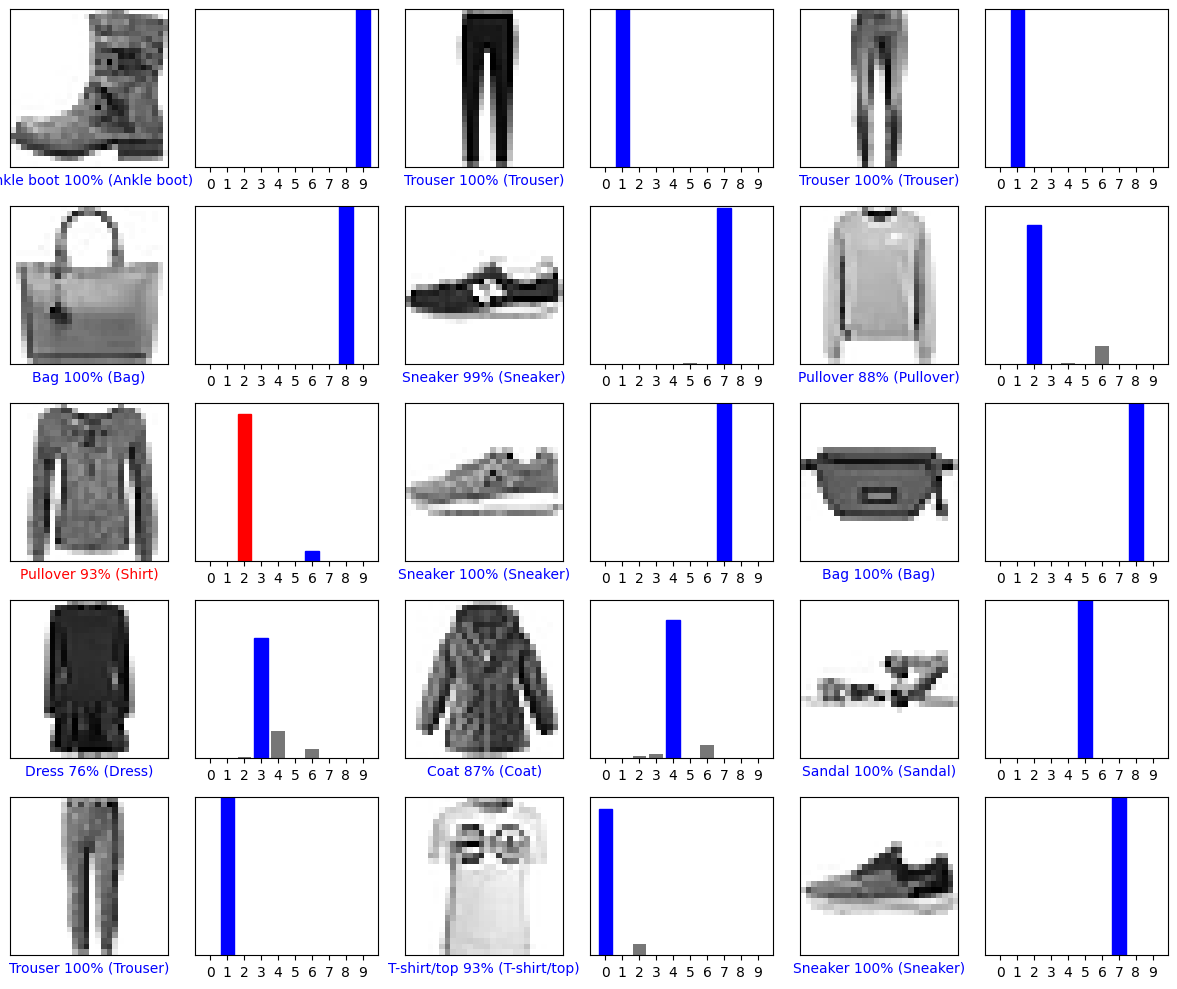

In [72]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  n = random.randint(0, len(X_test))
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(n, predictions[n], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(n, predictions[n], y_test)
plt.tight_layout()
plt.show()

# Deploy Model

In [74]:
def classify(image):
    image = image.reshape(1, 784) / 255.0
    prediction = fashion_model.predict(image)[0]
    return {str(i): prediction[i] for i in range(10)}

inputs = gr.inputs.Image(shape=(28, 28))
outputs = gr.outputs.Label(num_top_classes=3)
title = "Fashion Style Classifier"
description = "Discover the fashion style of clothing items using AI! Upload an image and see the top predicted fashion classes."

demo = gr.Interface(fn=classify, inputs=inputs, outputs=outputs, title=title, description=description, live=True)
demo.launch(debug= True, share= True)

<ipython-input-74-06dfb3e26af8>:6: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs = gr.inputs.Image(shape=(28, 28))
<ipython-input-74-06dfb3e26af8>:6: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs = gr.inputs.Image(shape=(28, 28))
<ipython-input-74-06dfb3e26af8>:7: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs = gr.outputs.Label(num_top_classes=3)
<ipython-input-74-06dfb3e26af8>:7: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  outputs = gr.outputs.Label(num_top_classes=3)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://95d09f6802c9927381.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://95d09f6802c9927381.gradio.live
